### 📚 Chapter4 신경망 학습
#### 4.1 데이터에서 학습한다!
##### 4.1.1 데이터 주도 학습
🔹 5 ---> 사람이 생각한 알고리즘 -------------> 결과<br>
🔹 5 ---> 사람이 생각한 특징 ---> 기계학습 ---> 결과<br>
🔹 5 ---> 신경망 (딥러닝) -------------------> 결과

🌟 딥러닝 = 종단간 기계학습 : 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻
##### 4.1.2 훈련 데이터와 시험 데이터
🔹 `범용 능력`을 제대로 평가하기 위해 훈련 데이터와 `시험 데이터`로 분리<br>
🔹 `Overfitting` : 한 데이터셋에만 지나치게 최적화된 상태
#### 4.2 손실함수
🔹 손실함수 : '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색할 때 지표로 사용, `오차제곱합`과 `엔트로피 오차`
##### 4.2.1 오차제곱합
🔹 $ E $ = $\frac{1}{2}\displaystyle\sum_{k} (y_k - t_k)^2$ <br>
🔹 $y_k$ : 신경망이 추정한 값, $t_k$ : 정답 레이블, k : 데이터의 차원 수

In [1]:
# "손글씨 숫자 인식" 예에서 y_k와 t_k는 다음과 같음
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    # 소프트맥스 함수의 출력
k = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

📌 이미지가 '0'일 확률은 0.1, '1'일 확률은 0.05, '2'일 확룰은 0.6이라고 해석<br>
📌 t는 정답을 가르키는 위치의 원소는 1로, 그 외에는 0으로 표기 --> 정답 = '2' <br>

🌟 `원-핫 인코딩` : 한 원소만 1로 하고 그 외에는 0으로 나타내는 표기법

In [2]:
# 오차제곱합 파이썬 구현
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y - k) ** 2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1) '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 예2) '7'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

📌 오차제곱합 기준으로 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단

##### 4.2.2 교차 엔트로피 오차
🔹 $ E $ = $-\displaystyle\sum_{k} t_k logy_k$ <br>
🔹 $y_k$ : 신경망이 추정한 값, $t_k$ : 정답 레이블 (원-핫 인코딩), k : 데이터의 차원 수

In [5]:
# 자연로그의 그래프
x = np.arange(0, 1, 0.01)

C:\Users\user\AppData\Local\Temp\ipykernel_15172\2190314817.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x))


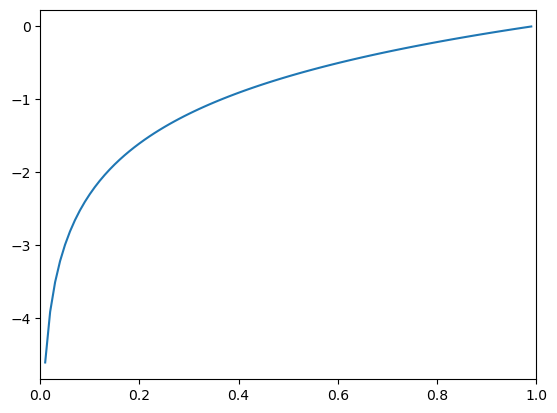

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, np.log(x))
plt.xlim(0, 1)
plt.show()

In [7]:
# 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# np.log()함수에 0을 입력하면 마이너스 무한대가 되기 때문에 아주 작은 값인 delta를 더해줌

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

📌 오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단

##### 4.2.3 미니배치 학습
🔹 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법 - 교차 엔트로피 오차<br>
🔹 $ E $ = $-\frac{1}{N} \displaystyle\sum_{n} \displaystyle\sum_{k} t_{nk} logy_{nk}$
- $y_{nk}$ : 신경망의 출력, $t_{nk}$ : 정답 레이블, n번째 데이터의 k번째 값
- 마지막에 N으로 나누어 정규화 (평균 손실 함수)

🔹 미니배치 학습: 훈련 데이터로부터 일부만 골라 학습 수행

In [10]:
# MNIST 데이터셋 불러오기
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

In [11]:
(x_train, t_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [12]:
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [13]:
# 무작위로 10장만 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

##### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [16]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
